In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [348]:
datei = "merge.csv"

df = pd.read_csv(datei, delimiter=";")
#df2 = df[["Time", "SDS_P1", "SDS_P2"]]

df["Time"] = pd.to_datetime(df["Time"],errors="coerce")

df2 = df[["Time", "SDS_P1", "SDS_P2"]]
df2.shape

df2.dropna()
df2.to_csv("neu.csv", index=True)

In [4]:
datei2 = "neu.csv"

df3 = pd.read_csv(datei2, delimiter=",", index_col=0)

df3["Time"] = pd.to_datetime(df3["Time"])
df3.dropna()



df3.head(10)
df3['SDS_P1'] = pd.to_numeric(df3['SDS_P1'],errors='coerce')   # warum auch immer es vorher als strings geparsed wurde
df3['SDS_P2'] = pd.to_numeric(df3['SDS_P2'],errors='coerce')



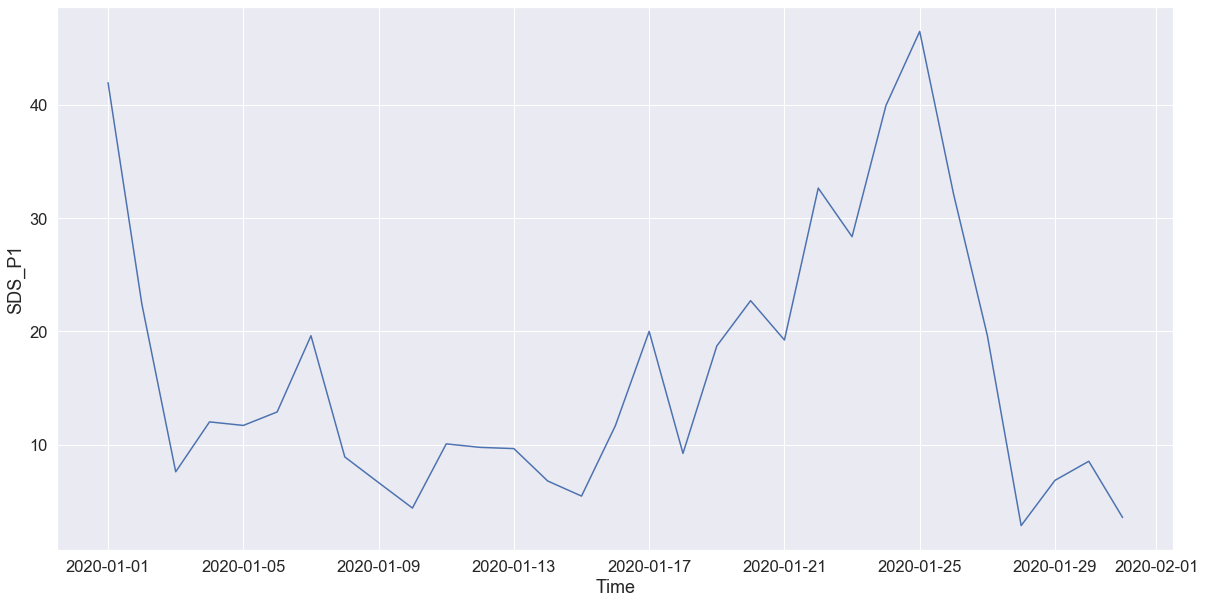

In [12]:
df_test2 = df3.groupby(pd.Grouper(key="Time", freq="1440Min")).mean()

df_test2.head()
df_test2.reset_index(level=0, inplace=True)

df_test2.head()
plt.figure(figsize=(20,10))
sns.lineplot(x="Time", y="SDS_P1", data=df_test2)



In [368]:
#df6 = pd.read_csv("neu2.csv", delimiter=",")


C:\Users\brq\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


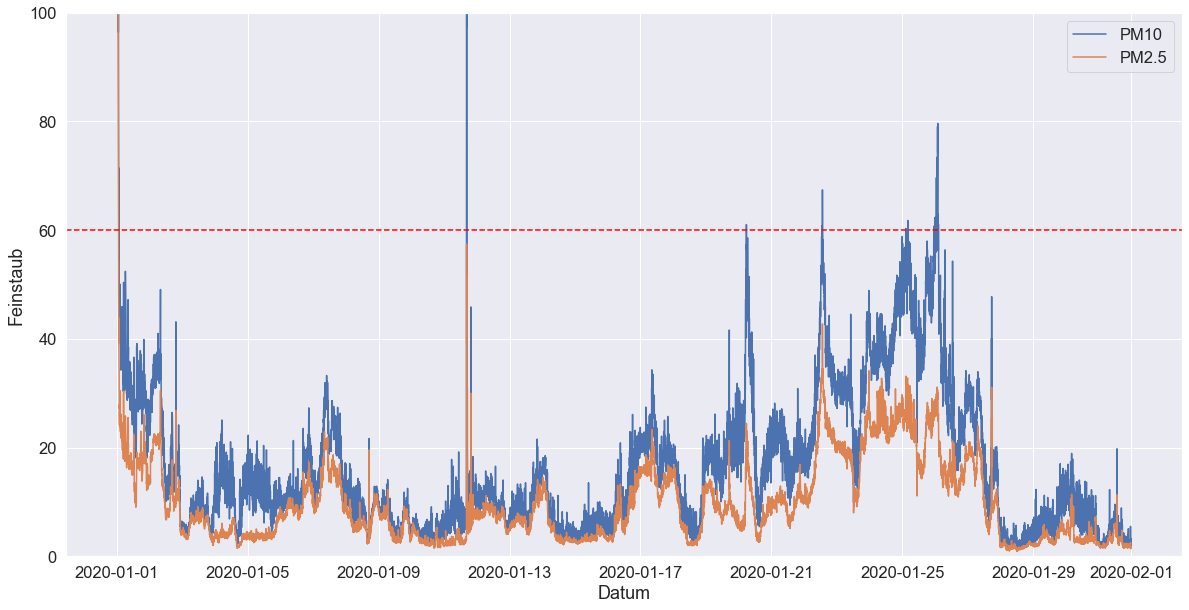

In [2]:
dataframe = pd.read_csv("neu.csv", sep=",",index_col=0)
dataframe.head()

dataframe['SDS_P1'] = pd.to_numeric(dataframe['SDS_P1'],errors='coerce') 
dataframe['SDS_P2'] = pd.to_numeric(dataframe['SDS_P2'],errors='coerce')
dataframe["Time"]   = pd.to_datetime(dataframe["Time"], errors="coerce")

plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)

g = sns.lineplot(x="Time", y="SDS_P1", data=dataframe)
g = sns.lineplot(x="Time", y="SDS_P2", data=dataframe)
plt.ylabel("Feinstaub")
plt.xlabel("Datum")
plt.ylim(0,100)
plt.legend(labels=['PM10', 'PM2.5'])

plt.axhline(y=60,color='red',linestyle='--')
